Quantization Error (QE): 0.05208289552868226
Topographic Error (TE): 0.5


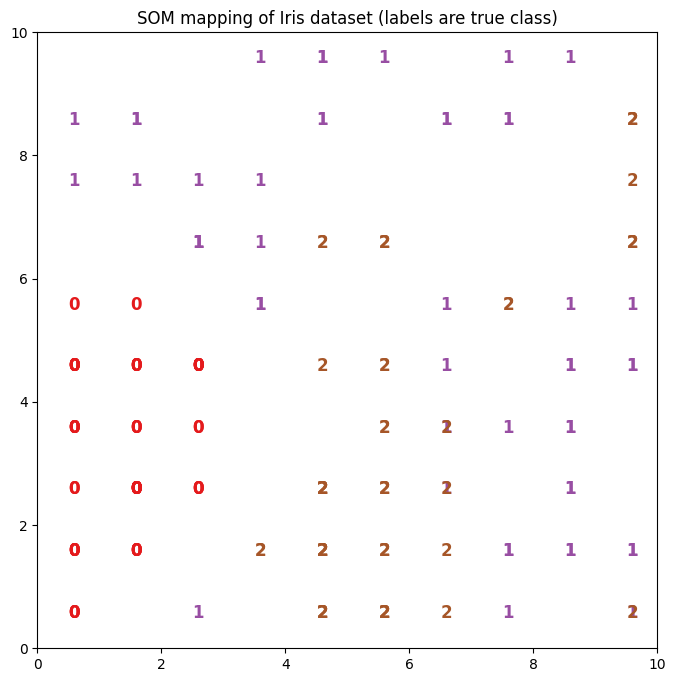

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from minisom import MiniSom   # pip install minisom

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 정규화 (SOM은 스케일 민감)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# ------------------------
# 1) KMeans
# ------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# ------------------------
# 2) SOM
# ------------------------
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X)
som.train_random(X, 1000)

# 각 샘플의 BMU 위치
som_labels = np.array([som.winner(x) for x in X])

# ------------------------
# 품질 지표 (SOM)
# ------------------------
# Quantization Error (QE)
qe = np.mean([np.linalg.norm(x - som.get_weights()[som.winner(x)]) for x in X])

# Topographic Error (TE)
def topographic_error(som, data):
    error_count = 0
    for x in data:
        dists = np.linalg.norm(som.get_weights() - x, axis=2)
        bmu1, bmu2 = dists.argsort(axis=None)[:2]  # BMU, 2nd BMU
        bmu1 = np.unravel_index(bmu1, dists.shape)
        bmu2 = np.unravel_index(bmu2, dists.shape)
        # 두 BMU가 인접하지 않으면 error
        if abs(bmu1[0]-bmu2[0]) + abs(bmu1[1]-bmu2[1]) > 1:
            error_count += 1
    return error_count / len(data)

te = topographic_error(som, X)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

# ------------------------
# 시각화: SOM 매핑 결과
# ------------------------
plt.figure(figsize=(8,8))
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y[i]),
             color=plt.cm.Set1(y[i]/3.), fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0,10]); plt.ylim([0,10])
plt.title("SOM mapping of Iris dataset (labels are true class)")
plt.show()


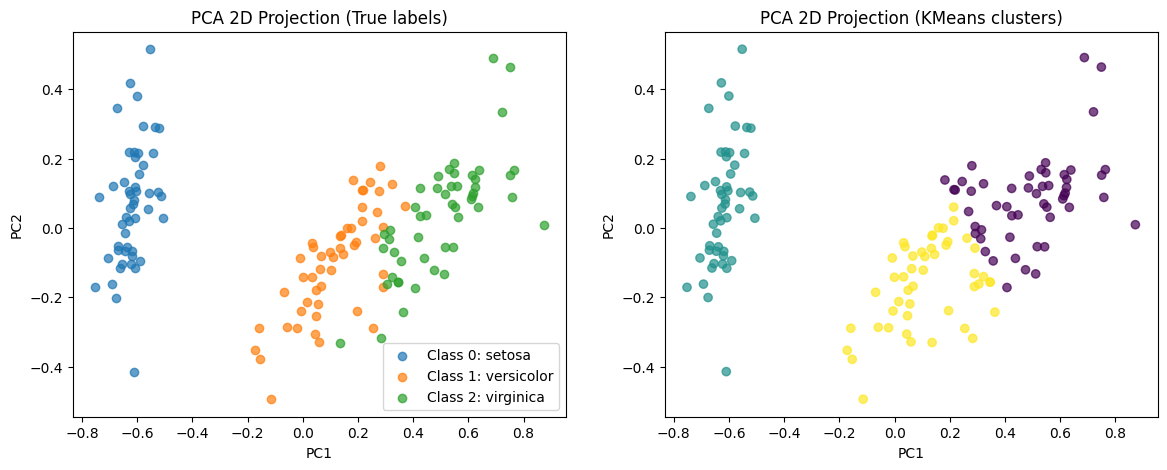

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from minisom import MiniSom   # pip install minisom

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 정규화 (SOM은 민감)
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# ------------------------
# 2. KMeans 클러스터링
# ------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_norm)

# ------------------------
# 3. PCA (2D 시각화용)
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

plt.figure(figsize=(14,5))

# PCA + 실제 클래스
plt.subplot(1,2,1)
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y==i,0], X_pca[y==i,1], label=f"Class {i}: {name}", alpha=0.7)
plt.title("PCA 2D Projection (True labels)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()

# PCA + KMeans 결과
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis", alpha=0.7)
plt.title("PCA 2D Projection (KMeans clusters)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.show()

# ------------------------
# 4. SOM
# ------------------------
som = MiniSom(x=10, y=10, input_len=X_norm.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_norm)
som.train_random(X_norm, 1000)


